Привет, Нура! 

Меня зовут Светлана Медведева и я буду проверять Твою работу. Предлагаю общаться на "ты". 

При обнаружении у Тебя в работе ошибки, в первый раз я лишь укажу на ее наличие и у Тебя будет возможность самому найти её и исправить. В реальной работе твой начальник будет поступать также, а я пытаюсь подготовить тебя именно к работе аналитиком. Однако если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку.

Просьба при доработке работы оставлять мои комментарии без изменений.

Комментарии я разделяю на следующие категории:

<div class="alert alert-block alert-success">
В случае если всё верно!
</div>


<div class="alert alert-block alert-warning">
В случае если можно что-то доработать, но эта доработка не критична или если есть варианты улучшения работы.
</div>

<div class="alert alert-block alert-danger">
Замечания, которые нужно исправить. Без исправления этих замечаний проект принят не может быть.
</div>

### <font color='blue'>Резензия на работу v. 1</font> <a class="tocSkip">
* К сожалению, иногда на платформе возникают проблемы с сохранением и отправкой работ. Поэтому Тебе пришла неполная версия ревью. Прощу прощения, что Тебе пришла промежуточная версия ревью проекта.
* Исправь, пожалуйста, период времени выбранный для анализа. Кроме того, необходимо добавить промежуточные вывод и описание/анализ графиков (там где его нет).
* Успехов!
    
### <font color='blue'>Резензия на работу v. 2</font> <a class="tocSkip">
* 
* Успехов!

# Ознакомление с материалом.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

Первый взгляд на собранные данные:

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


__Промежуточный вывод:__ 

Полученные данные имеют корректный формат для проведения анализа и работы с помощью библиотеки Pandas, однако массив информации требует предобработки (устранения пропусков, изменения типов данных и избавления от дубликатов как минимум).

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 2:
    
Добавь, пожалуйста, промежуточный вывод. Просьба учесть, что после каждого раздела должен быть промежуточный вывод.
</div>

# Подготовка данных для дальнейшей работы.

Отдельно рассмотрим информацию о каждом столбце. Нужно преобразовать некоторые столбцы нужному типу данных, дабы не возникало проблем при их обработке. Можно начать с __приведения столбцов к нижнему регистру.__

In [5]:
data.columns = data.columns.str.lower()

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Отлично, названия столбцов к нижнему регистру приведены.
</div>

● Неподдельный интерес на данный момент вызывает столбец __User_Score__ из-за своего типа данных "object", ведь в сравнении с практически одинаковым столбцом __Critic_Score__, что имеет тип данных "float", это смотрится негармонично и видимо требует внимания в вопросе подготовки.

In [6]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

На первый взгляд кажется, что все данные в порядке, однако есть одна маленькая загвоздка в виде элемента 'tbd'. Перед тем, как делать какие-либо выводы хотелось бы узнать их общее количество в данной таблице.

In [7]:
data[data['user_score'] == 'tbd'].shape[0]

2424

Около 2400 строк у нас имеют подобный пользавательский рейтинг, что говорит о том, что это никакая не ошибка. 

Про данным из интернет ресурсов, выяснилось, что __TBD__ - это аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований. 

Фактически для нас, это то самое значение NaN.

In [8]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN).astype('float')

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Да, значение  'tbd' логично заменить на NaN.
</div>

● __Year_of_Release__ - странно, что дата релиза игры имеет тип данных с плавающей точкой, когда по факту оно должно быть целым числом. Также пропуски в этой части практически незначительны, однако могут быть проблематичны, поэтому было бы неплохо заменить их на какое-то условное значение. В нашем случае, пусть это будет "3000 год", ибо нам не известна конкретная дата выхода видеоигры.

In [9]:
data['year_of_release'] = data['year_of_release'].fillna(3000).astype('int')

In [10]:
data['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 3000, 1995,
       1991, 1981, 1987, 1980, 1983])

Думаю, теперь необходимо установить то, какие у нас потери информации в таблице и визуализировать в целом наше положение.

In [11]:
percentage_of_wastes = (data.isnull().sum()/data.shape[0]*100).sort_values()
print(percentage_of_wastes)

platform            0.000000
year_of_release     0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
name                0.011965
genre               0.011965
rating             40.478612
critic_score       51.319174
user_score         54.591684
dtype: float64


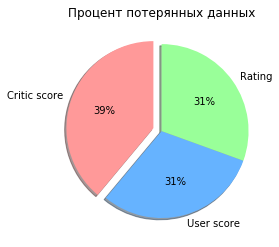

In [12]:
labels = ['Critic score','User score', 'Rating']
sizes = [51, 40, 40]
explode = (0.1, 0, 0)
colors = ['#ff9999','#66b3ff','#99ff99']
fig1, ax1 = plt.subplots()
plt.title('Процент потерянных данных')
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.0f%%',
        shadow=True, startangle=90)
plt.show()

Стобцы __Genre__(0.011965%) и __Name__(0.011965%) терпят незначительные пропуски данных, однако можно подметить, что большая часть потерянных данных именно из столбцов __Critic_Score__(51.319174%), __Rating__(40.478612%), __User_Score__(40.089740%). Критически мало данных для трех вышеперечисленных характеристик, поэтому дальнейшие действия будут направлены на их заполнение. 

● __Critic_Score__ - так как большинство игр практически не были оценены критиками свободные поля можно было бы заменить на нулевой рейтинг, но это может привести к противоречию по отношению к играм с уже существующим нулевым рейтингом, а заполнение средним значением или медианой было бы неправильно, ведь мы не знаем точные причины отсутсвия рейтинга.

● __Rating__ - невозможно определить среднее значение или медиану для этого столбца тоже, так как на разных платформах и в целом жанрах игр могут быть совершенно различные возрастные ограничения, поэтому выделим их как отдельную группу __"not rated"__.

● __User_Score__ - поступаем также как и с __Critic_Score__.

● __Name__ - имя не определено по неизвестным причинам, но в целом характеристика продаж от этого не страдает, поэтому спокойно можно обработать данные как __"unknown"__.

● __Genre__ - аналогично как и со столбцом наименования игры, данные можно взять как __"undefined"__.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Молодец, что детально проанализировала процент пропусков в данных.
</div>

In [13]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [14]:
data['critic_score'] = data['critic_score'].fillna(-1)
data['user_score'] = data['user_score'].fillna(-1)
data['rating'] = data['rating'].fillna('not rated')
data['name'] = data['name'].fillna('unknown')
data['genre'] = data['genre'].fillna('undefined')

● Замена для столбцов __critic_score__ и __user_score__ взята как __-1__ из-за того, что у нас уже есть игры с реальным нулевым рейтингом как в оценках пользователей, так и в оценках критиков. Если бы мы взяли __0__ как замену, то низкорейтинговые игры и пропуски смешались бы. 

● В столбце __rating__ замена взята как __без рейтинга__, игры на разных платформах, в разный период времени, в разных странах могут отличаться рейтингом и контентом, поэтому поставим всем общую группу. 

● Так же поступаем со столбцами __name__ и __genre__, заменяя пропуски на __неизвестный__ и __не определенный__, ибо у нас есть данные о продажах игры, что позволяет проводить какие-то манипуляции над продуктами без имени или жанра. 

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 2:
    
Аргументируй, пожалуйста, выбранный метод для замены пропусков в данных.
</div>

In [15]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,not rated
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,not rated
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,not rated
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,not rated


Для контрольной проверки замены всех пропусков можно снова вывести проценты для каждого столбца.

In [16]:
print((data.isnull().sum()/data.shape[0]*100).sort_values())

name               0.0
platform           0.0
year_of_release    0.0
genre              0.0
na_sales           0.0
eu_sales           0.0
jp_sales           0.0
other_sales        0.0
critic_score       0.0
user_score         0.0
rating             0.0
dtype: float64


Как мы видим, в таблице больше не присутствуют пропущеные значения, но стоит также провести проверку на наличие дубликатов.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Отлично, пропуски обработаны.
</div>

In [17]:
print(f'Найдено всего {data.duplicated().sum()} дубликатов!')

Найдено всего 0 дубликатов!


Теперь можно перейти к счету суммарных продаж во всех регионах и записать их в новом столбце.

In [18]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null float64
user_score         16715 non-null float64
rating             16715 non-null object
total_sales        16715 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [19]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,not rated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,not rated,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,not rated,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,not rated,28.31


__Промежуточный вывод:__

● названия столбцов приведены в к нижнему регистру;

● пропуски в оценках игр обоснованно были заменены без конфликтов с играми с нулевым рейтингом;

● заполнены пропуски в рейтинге игр;

● данные преобразованы к нужному типу;

● описаны причины замены аббревиатуры __tbd__ в пользовательском рейтинге на NaN, было объяснено значение данного выражения и подтверждено отсутствие ошибки;

● были посчитаны суммарные продажи игры по всем регионам и прописаны в отдельный столбец __total_sales__.

Данные были тщательно предобработаны и готовы к проведению аналитической задачи проекта.

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 2:
    
Сформулируй, пожалуйста, промежуточный вывод по итогам анализа и обработки данных.
</div>

# Исследовательский анализ данных.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Кстати, можно убрать вывод "Text(0, 0.5, 'Продажи в млн')" добавив ";" после кода с графиком.
</div>

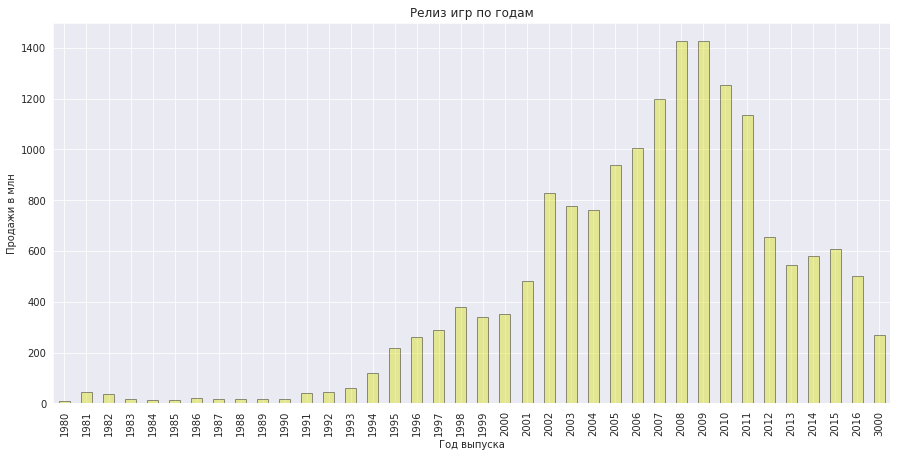

In [20]:
sns.set_style('darkgrid')
data.groupby('year_of_release')['platform'].count().plot(kind = 'bar', figsize = (15, 7), color = '#D7DF01', alpha = 0.4, ec='black', title = 'Релиз игр по годам')
plt.grid(True)
plt.xlabel('Год выпуска')
plt.ylabel('Продажи в млн');

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Превосходный график :) Молодец, что не забыла подписи по осям и заголовок к графику.
</div>

По получившейся диаграмме можно прийти к выводу, что пик разработки игр пришелся на 2007-2008 год, до 1994 года никакого роста практически не наблюдалось и количество игр держалось на достаточно низком уровне. Так же заметно резко снизилось издание игр после 2011 года, видимо этот спад пришелся на время финансового кризиса, развития мобильных устройств и устаревания определенных платформ. Стабильность наблюдается лишь у PC, как у прогрессивно обновляемой платформы, по сравнению с теми же игровыми консолями и приставками. Отчасти можно назвать и популяризацию социальных сетей как причину спада, что привело к падению производства игр.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Молодец, что детально проанализировал адинамику числа выпускаемых игр. Ещё к спаду мог привести рост популярности мобильных игр.
</div>

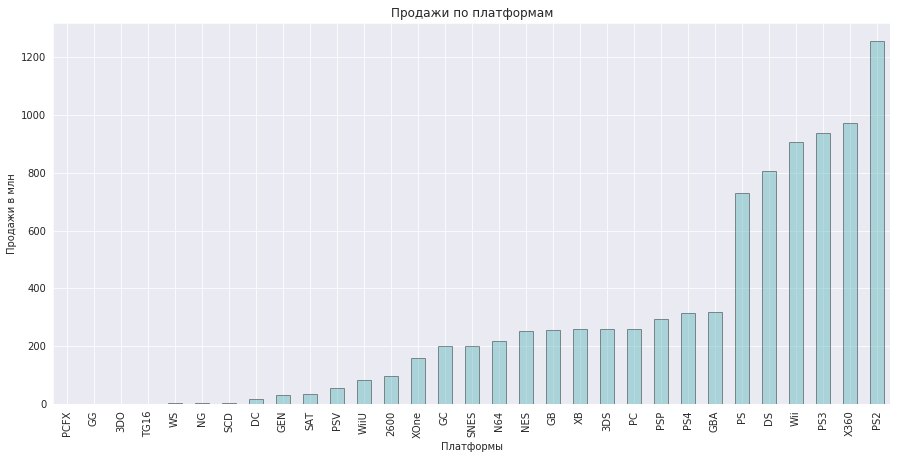

In [21]:
data.groupby('platform')['total_sales'].sum().sort_values().plot(kind = 'bar', figsize = (15, 7), color = '#48AEB5', alpha = 0.4, ec='black', title = 'Продажи по платформам')
plt.xlabel('Платформы')
plt.ylabel('Продажи в млн');

Продажи по платформе PS2 на голову выше конкурентов. PS2 - игровая приставка, ставшая наиболее быстро продаваемой и самой популярной игровой консолью в истории. После нее в лидирующую тройку вошли: X360 (небезызвестная консоль от американской корпорации Microsoft) и PS3 (из той же линейки японских консолей от Sony).

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Отлично, наиболее популярные платформы выявлены.
</div>

In [22]:
pl = data['platform'].unique().tolist()

ex = []
estab = []
diedout = []
for item in pl:
    existence = len(data.loc[data['platform'] == item, 'year_of_release'].unique())
    ex.append(existence)
    est = data.loc[data['platform'] == item, 'year_of_release'].min()
    estab.append(est)

In [23]:
stat = {'platforms':pl, 'period': ex, 'established': estab}

platform_stat = pd.DataFrame(stat)
platform_stat

,platforms,period,established
0,Wii,12,2006
1,NES,12,1983
2,GB,14,1988
3,DS,12,1985
4,X360,13,2005
5,PS3,12,2006
6,PS2,13,2000
7,SNES,10,1990
8,GBA,9,2000
9,PS4,4,2013


In [24]:
avg_ex = platform_stat['period'].mean()
print(f"Средняя продолжительность существования платформы на рынке игровой индустрии составляет {avg_ex:.1f} лет.")

Средняя продолжительность существования платформы на рынке игровой индустрии составляет 8.2 лет.


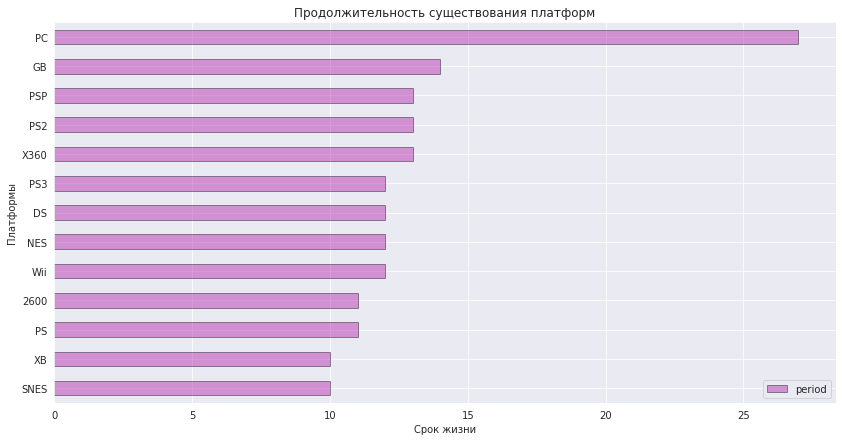

In [25]:
platform_stat.query('period>=10').sort_values(by = 'period').plot(kind='barh', x='platforms', y='period', figsize=(14,7), ec = 'black', color = '#ad09a3', alpha = 0.4, grid = True, title = 'Продолжительность существования платформ')
plt.xlabel('Срок жизни')
plt.ylabel('Платформы');

По графику выше можно придти к выводу, что __PC__ из-за своей особенности адаптивности и обновляемости существует более 25 лет, что практически в 2, а то и в 3 раза больше, чем у любой же другой приставки из этой дюжины. Ни одна платформа так и не смогла повторить успех PC, однако здесь также можно заметить, что даже после выхода новой версии определенной платформы какое-то время продолжается выпуск новых игр на старой платформе, то есть жизненный цикл не прерывается резко с выходом обновленной платформы, а постепенно завершается. 

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 2:
    
Добавь, пожалуйста, описание/выводы к графику. Просьба учесть, что после каждого графика должно быть описание/выводы.
</div>

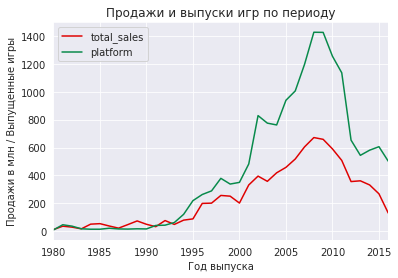

In [26]:
data[data['year_of_release'] != 3000].groupby('year_of_release')['total_sales'].sum().plot(legend=True, title='Продажи и выпуски игр по периоду', color = '#DF0101')
data[data['year_of_release'] != 3000].groupby('year_of_release')['platform'].count().plot(legend=True, grid=True, color = '#088A4B')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи в млн / Выпущенные игры')
plt.show()

График показывает количество выпущенных игр и их выручку за период от 1980-2016. Несмотря на резкий рост релизов, начиная с 2000 года, прибыль от продаж игр выросла не на столько масштабно. В период от 2010 по 2016 и вовсе наблюдается значительное сокращение продаж, до уровня поздних девяностых, когда такого активного развития игровой индустрии не наблюдалось.

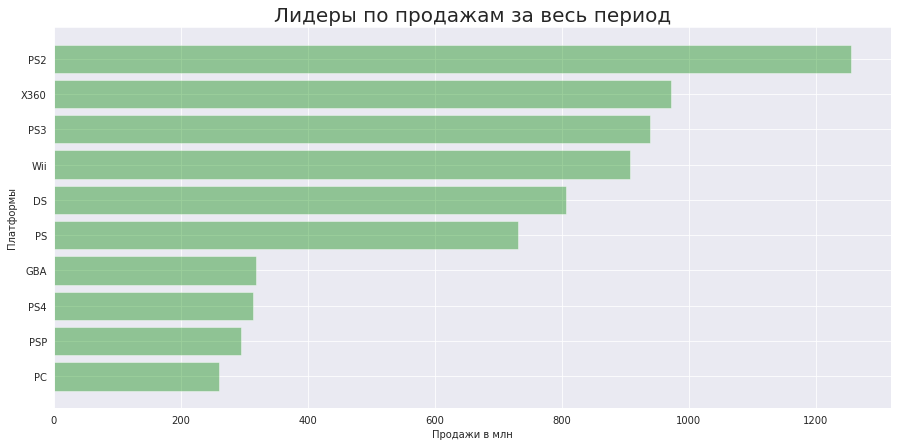

In [27]:
plt.figure(figsize=(15, 7))
pl_sales = data.pivot_table('total_sales', index = 'platform', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = True).tail(10)
pls = pd.DataFrame(data=pl_sales).reset_index()
plt.barh(pls['platform'], pls['total_sales'], alpha = 0.4, color='#088A08')
plt.grid(True)
plt.title('Лидеры по продажам за весь период', fontsize = 20)
plt.xlabel('Продажи в млн')
plt.ylabel('Платформы')
plt.show()

Если рассматривать данные за все время, практически больше половины продаж пришлось на платформы PS2, X360, PS3, Wii, DS и PS. 

Посмотрим как обстоят дела с продажами спустя какое-то количество лет, предположительно в период от 2010-2016 год:

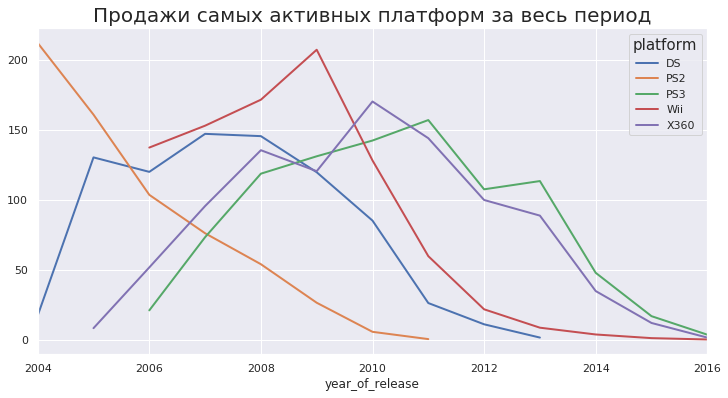

In [65]:
top_6 = pls['platform'].tail(6)
sixteen = pd.DataFrame(data[(data['year_of_release'] >= 2004) & (data['year_of_release'] <= 2016) & (data['platform'].isin(top_6))]).pivot_table(values = 'total_sales', index = 'year_of_release', columns = 'platform', aggfunc = 'sum')
sixteen.plot(figsize=(12, 6), lw=2, alpha=1)
plt.title('Продажи самых активных платформ за весь период', fontsize = 20)
plt.grid(True)
plt.show()

Судя по полученной информации, для дальнейшего анализа предположительно будет ошибочно использовать данные за все время. К примеру PS2, как лидер по продажам, уже сильно устарела и потеряла продажи ближе к 2016 году. Значит, для дальнейших дейтсвий необходимо проделать примерно такое же исследование, но на срезе с более актуальными данными. 

In [29]:
late2014 = platform_stat[platform_stat['established'] >= 2011]
l14 = late2014['platforms'].to_list()
l14.append('PC')
late2014

,platforms,period,established
9,PS4,4,2013
10,3DS,7,2011
17,XOne,4,2013
18,WiiU,5,2012
22,PSV,7,2011


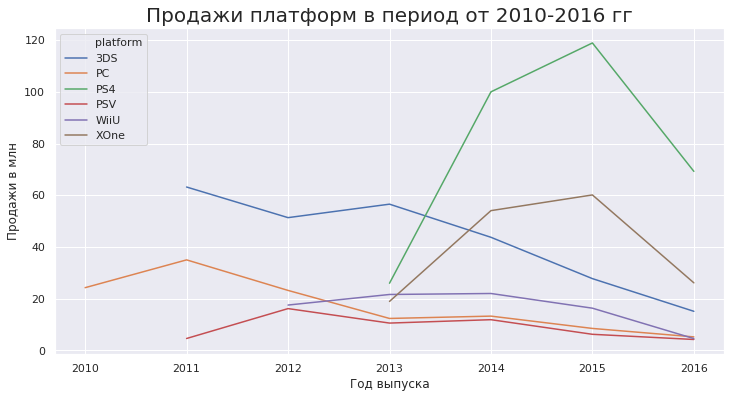

In [67]:
plt.figure(figsize=(12,6))
sns.lineplot(x='year_of_release',y='total_sales',hue='platform',markers=True, color = colors, data=(data.query('year_of_release >= 2010 & platform in @l14 & year_of_release != 3000').groupby(['platform','year_of_release'])['total_sales'].agg('sum').reset_index()))
plt.title('Продажи платформ в период от 2010-2016 гг', fontsize = 20)
plt.xlabel('Год выпуска')
plt.ylabel('Продажи в млн')
plt.grid(True)

Предположительно,чтобы исключить значимое искажение распределения по платформам в 2016 году, мы возьмем данные за период __2014-2016 года__, в котором динамика игровой индустрии была __наименее прогрессивна за последнее десятилетие__ и близка к рассматриваемой дате:

● продажи заметно упали, из-за чего большинство старых платформ в этот период исчезли с рынка;

● появились ныне известные платформы, которые укрепили свои позиции в течении выбранного периода(PS4, XOne);

● объем продаж компьютерных игр с каждым годом все меньше;

● игры за это время имеют довольно заполненные характеристики.

////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


● Большинство актуальных на 2016 год игровых платформ появились после 2010 года;

● Стоит отметить, что актуальные на 2010 год 'PS3' и 'X360' к 2016 практически полностью утратили продажи, так как были заменены в 2014 году новыми поколениями игровых платформ 'PS4', 'Wii' и 'XOne'. В данном случае нет смысла продвигать старые платформы, не будем их учитывать при анализе;

● Игровые платформы для исследования: 'PS4', '3DS', 'XOne', 'WiiU', 'PC', 'PSV.

////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


__Выводы:__ по прогнозам на 2016 год основные популярные платформы 'PS4'(Лидер по продажам, пик примерно 120 млн), '3DS'(Единственная портативная консоль, держащаяся в топе по продажам, пик примерно 58-60 млн, продажи упали после 2013), 'XOne'(Второй лидер, у которого продажи практически вдвое меньше чем у той же PS4, пик примерно 60 млн), 'WiiU'(не особо популярная, но и не безызвестная приставка данного периода, пик 20 млн), 'PC'(одна из самых стабильных платформ). 

__Рейтинг:__ 


1. Sony PlayStation 4
2. Xbox One
3. Nintendo DS
4. PC

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 1:
    
На самом деле нужно выбрать период времени для построения прогноза с 2014 года. Как Ты думаешь почему? Я продолжу проверку работы после исправления периода выбранного для анализа.
</div>

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 2:
    
Исправь, пожалуйста, период времени выбранный для анализа и после этого я продолжу проверку проекта.
    
Выбор периода времени с 2014 года связан с тем, что резкий спад платформы может произойти буквально за 3 года. Видим, что лидер по продажам за всю историю PS2. Но продажи к 2011 году уже нулевые. X360 был на пике в 2010, но к 2016 упал почти до 0.
</div>

Построение графика «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам:

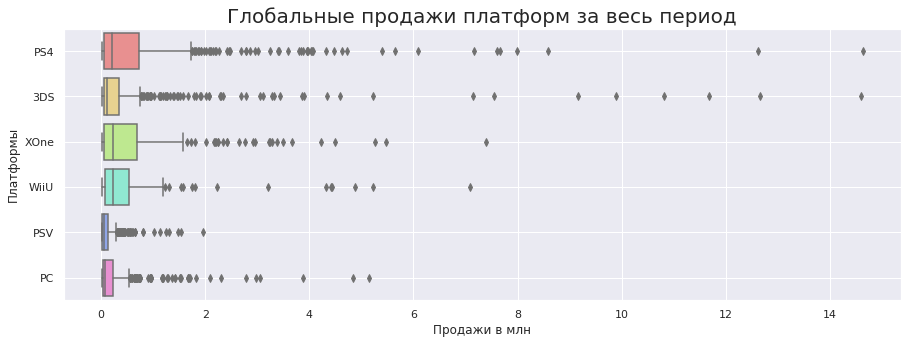

In [68]:
plt.figure(figsize=(15,5))
colors = ['#F78181', '#F5DA81', '#BEF781', '#81F7D8', '#819FF7', '#F781D8']
sns.boxplot(y='platform', x='total_sales', data = data.query('year_of_release >= 2010 & platform in @l14 & year_of_release != 3000'), order=l14, palette = colors)
plt.title('Глобальные продажи платформ за весь период', fontsize = 20)
plt.ylabel('Платформы')
plt.xlabel('Продажи в млн')
plt.grid(True)
plt.show()

Исходя из графика заметно, что продажи PlayStation 4 и XOne довольно аналогичны. Скорее всего это вызвано тем, что большинство игры выпускают одновременно на обе платформы. Конечно встречаются эксклюзивные релизы, которые выводят PS4 в лидирующее положение по прибыли и количеству игр. Однако, boxplot показывает, что в целом разброс выручки от игр на PS4 & XOne одинаковый. Говоря о портативной консоли 3DS, то у неё разброс цен в два раза меньше, уступая по популярности первым двум.

In [32]:
print(f"Количестиво не оцененных критиками игр - {data[data['critic_score'] == (-1)]['critic_score'].count()}")
print(f"Количестиво оцененных критиками игр - {data[data['critic_score'] != (-1)]['critic_score'].count()}")
print()
print(f"Количестиво не оцененных пользователями игр - {data[data['user_score'] == (-1)]['user_score'].count()}")
print(f"Количестиво оцененных пользователями игр - {data[data['user_score'] != (-1)]['user_score'].count()}")

Количестиво не оцененных критиками игр - 8578
Количестиво оцененных критиками игр - 8137

Количестиво не оцененных пользователями игр - 9125
Количестиво оцененных пользователями игр - 7590


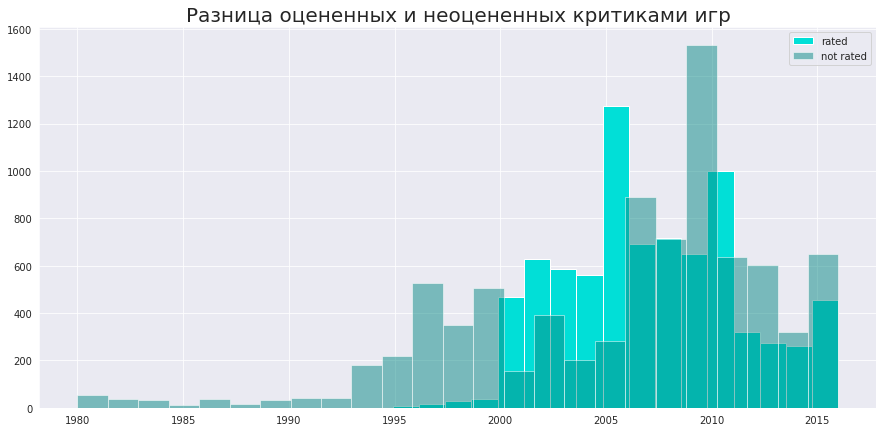

In [33]:
plt.figure(figsize=(15, 7))
data[(data['year_of_release'] != 3000) & (data['critic_score'] > 0)]['year_of_release'].hist(bins=25, color = '#01DFD7')
data[(data['year_of_release'] != 3000) & (data['critic_score'] == (-1))]['year_of_release'].hist(bins=25, alpha=0.5, color = '#088A85')
plt.title('Разница оцененных и неоцененных критиками игр', fontsize = 20)
plt.legend(['rated', 'not rated']);

Количество неоцененных критиками игр значительно превышает количество оцененных, что заметно по гистограмме, ниже приведена аналогичная гистограмма по оценкам пользователей:

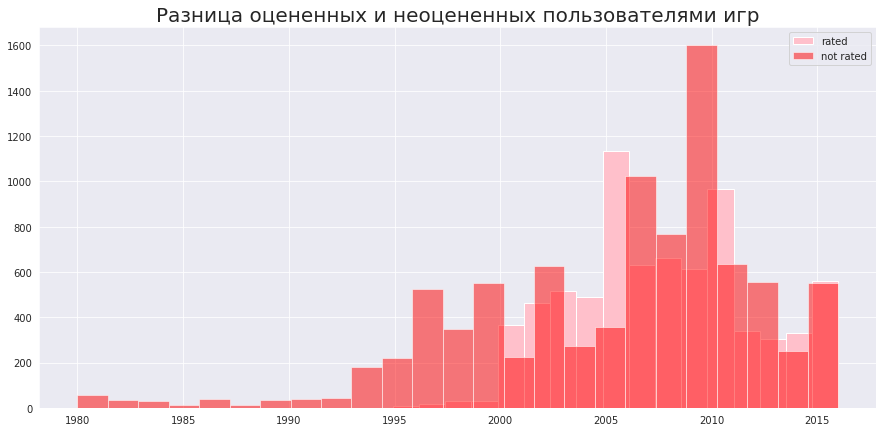

In [34]:
plt.figure(figsize=(15, 7))
data[(data['year_of_release'] != 3000) & (data['user_score'] > 0)]['year_of_release'].hist(bins=25, color = 'pink')
data[(data['year_of_release'] != 3000) & (data['user_score'] == (-1))]['year_of_release'].hist(bins=25, alpha=0.5, color = 'red')
plt.title('Разница оцененных и неоцененных пользователями игр', fontsize = 20)
plt.legend(['rated', 'not rated']);

Для дальнейшего анализа была взята приставка PlayStation2. Данная приставка, как и ее предшественница, стала рекордсменом, на этот раз по скорости достижения планки в 100 миллионов — на это ей потребовалось всего лишь пять с небольшим лет с момента появления на рынке.

In [35]:
data_PS2 = data[(data['platform'] == 'PS2') & (data['critic_score'] > 0) & (data['user_score'] > 0) & (data['year_of_release'] != 3000)]

In [36]:
#data_PS2.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(15, 8), alpha = 0.4, color = '#04B404', grid = True, xlim=(15, 100), ylim=(0, 10), s = 70, ec = '#0B610B')
#plt.show()

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 1:
    
Исправь, пожалуйста, ошибку в коде и после этого я  смогу продолжить проверку проекта.
</div>

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Отлично, ошибка в коде исправлена :)
</div>

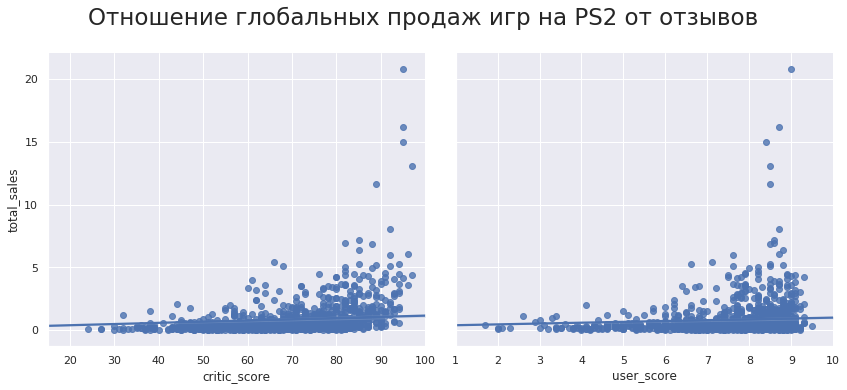

In [37]:
data_PS2 = data.query('platform in @top_6').loc[(data.query('platform in @top_6')['platform'] == 'PS2')]
sns.set()
ax = sns.pairplot(data_PS2, x_vars=['critic_score','user_score'], y_vars=['total_sales'], height=5, aspect=1.2, kind="reg")
ax.axes[0,0].set_xlim((15,100))
ax.axes[0,1].set_xlim((1, 10))
ax.fig.suptitle("Отношение глобальных продаж игр на PS2 от отзывов", y=1.08, size=23)
plt.show()

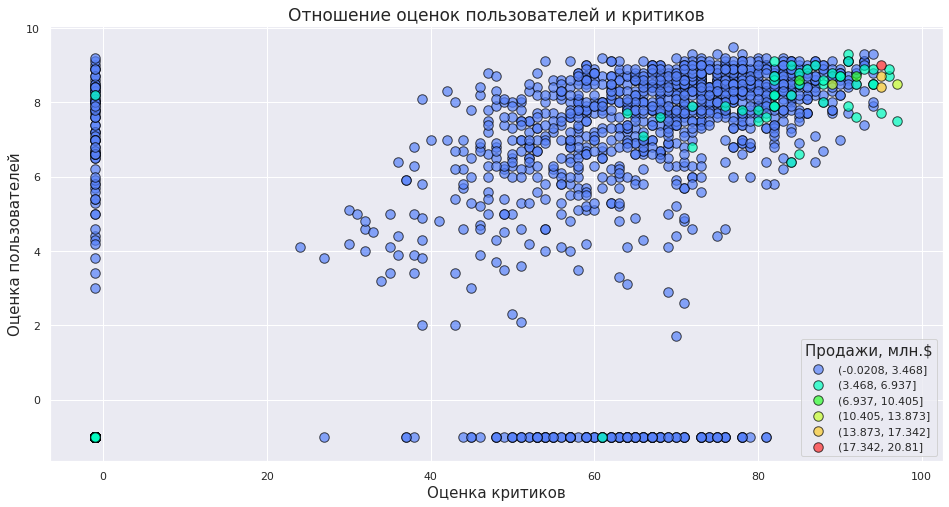

In [70]:
data_PS2['category'] = pd.cut(data_PS2['total_sales'], 6)
categories = np.unique(data_PS2['category'])

colors = ['#5882FA','#00FFBF','#2EFE2E', '#C8FE2E', '#FACC2E', '#FE2E2E'] 
plt.figure(figsize=(16, 8))

for i, category in enumerate(categories):
    plt.scatter('critic_score','user_score', data=data_PS2.loc[data_PS2.category==category, :], s=90, color=colors[i], label=str(category), ec='black', alpha=0.7)
plt.ylabel('Оценка пользователей', fontsize=15)
plt.xlabel('Оценка критиков', fontsize=15)
plt.title('Отношение оценок пользователей и критиков', fontsize = 17)
plt.legend(title='Продажи, млн.$')    
plt.show()

Подытоживая данные из полученных диаграмм, можно с уверенностью сказать, что игры с продажами в диапозоне от 10 млн имеют довольно высокую оценку как от критиков, так и от пользователей (практически строго выше 80 баллов). Самые продаваемые игры были расценены выше 90 баллов. Большая часть игр до 10 млн, держатся в диапозоне выше среднего, однако есть игры, набравшие низкие оценки. В целом, рейтинги не сильно расходятся, что дает нам понять схожесть взглядов критиков и игроков. Далее рассмотрим корреляцию ближе:

In [39]:
data_PS2[['total_sales', 'critic_score','user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.299548,0.259366
critic_score,0.299548,1.000000,0.807302
user_score,0.259366,0.807302,1.000000


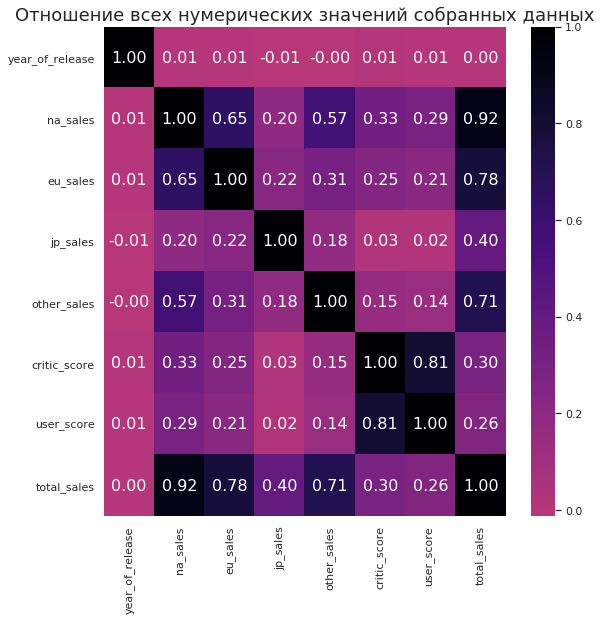

In [83]:
plt.figure(figsize=(9,9))
plt.title('Отношение всех нумерическиx значений собранных данных', fontsize = 18)
sns.heatmap(data_PS2.corr(), annot=True, cmap="magma_r", fmt='.2f', annot_kws={'size':16}, center = 0);

#annot - нумерические показатели таблицы

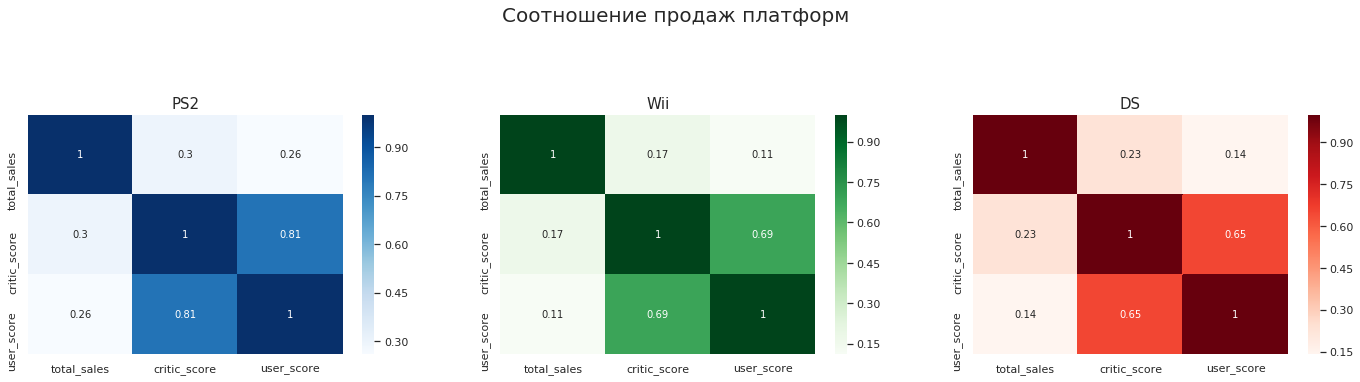

In [87]:
fig = plt.figure(figsize=(24,15))
fig.suptitle('Соотношение продаж платформ', fontsize = 20)
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)

data_ps2 = data_PS2[['total_sales', 'critic_score', 'user_score']]
ax1 = sns.heatmap(data_ps2.corr()[['total_sales', 'critic_score', 'user_score']].sort_values(by='total_sales', ascending=False), cmap="Blues", annot=True, annot_kws={'size':10}, ax = ax1)
ax1.set_title('PS2', fontsize = 15)

DS = data[(data['platform'] == 'DS') & (data['critic_score'] > 0) & (data['user_score'] > 0) & (data['year_of_release'] != 3000)]
data_ds = DS[['total_sales', 'critic_score', 'user_score']]
ax3 = sns.heatmap(data_ds.corr()[['total_sales', 'critic_score', 'user_score']].sort_values(by='total_sales', ascending=False), cmap="Reds", annot=True, annot_kws={'size':10}, ax = ax3)
ax3.set_title('DS', fontsize = 15)

Wii = data[(data['platform'] == 'Wii') & (data['critic_score'] > 0) & (data['user_score'] > 0) & (data['year_of_release'] != 3000)]
data_wii = Wii[['total_sales', 'critic_score', 'user_score']]
ax2 = sns.heatmap(data_wii.corr()[['total_sales', 'critic_score', 'user_score']].sort_values(by='total_sales', ascending=False), cmap="Greens", annot=True, annot_kws={'size':10}, ax = ax2)
ax2.set_title('Wii', fontsize = 15);

● Сильной взаимосвязи между отзывами пользователей и продажами нет(PS2 -26%, Wii-11%, DS-14%);

● Взаимосвязь между отзывами критиков и продажами выше по сравнению с отзывами пользователей, однако не слишком большая(PS2 -30%, Wii-17%, DS-23%);

● А вот взаимосязь между отзывами критиков и отзывами пользователей существует, чуть большая чем между отзывами критиков и продажами и отзывами пользователей и продажами вместо взятыми(PS2 -81%, Wii-69%, DS-65%).

Корреляция не говорит о причинно-следственной связи. И хотя по диаграммам рассеяния ясно, что чем выше оценки критиков, тем выше продажи игр на всех платформах, однако это не дает нам право утверждать, что высокие оценки критиками приводят к высоким продажам игр, а при покупке игры пользователи больше доверяют критикам, нежели другим игрокам.

Распределение игр по жанрам.

In [42]:
pop_genre = data.groupby('genre').agg({'name':'count', 'total_sales': 'sum'}).sort_values(by='name', ascending=False).reset_index()
pop_genre

,genre,name,total_sales
0,Action,3369,1744.17
1,Sports,2348,1331.27
2,Misc,1750,802.51
3,Role-Playing,1498,934.56
4,Shooter,1323,1052.45
5,Adventure,1303,237.59
6,Racing,1249,728.67
7,Platform,888,827.77
8,Simulation,873,389.97
9,Fighting,849,447.53


Самый прибыльный и активно обновляемый жанр как и предполагалось - action, затем первую троицу продолжает - sports также не уступающий по количеству выпускаемых игр и третий по выручке - shooter с 1052 млн продаж, а третий по выпускаемым играм - Misc.

__Промежуточный вывод:__

● Изучено количество выпускаемых игр в разные года, проанализирована динамика разработки и рассмотрены причины спада актуальности;

● Оценены распределения продаж по платформам и определенным периодам времени. Результаты визуализированы и обоснованы.

● Взят актуальный период для исключения значимого искажения распределения по платформам в 2016 году прогнозами, сделанными на основе данных за 2014-рассматриваемый год.

● Выбрана шестерка потенциально прибыльных платформ.

● Построен "ящик с усами" по глобальным продажам каждой игры и разбивкой по платформам, рассмотрена разница в продажах и описан результат.

● Показана корреляция между отзывами критиков и пользователей, оценена их совместимость и схожесть на основе анализа активно продоваемых игр, построена диаграмма рассеяния.

● Проанализировано общее распределение по жанрам, как по прибыльности, так и по производительности.

# Портрет пользователя каждого региона

Самые популярные платформы (топ-5)

In [43]:
def plot_test(region, char, axis):
    datafr = data.groupby(char).agg({region: 'sum'}).sort_values(by=region, ascending=False).head(5)
    titles = {'na_sales': 'Продажи в Северной Америке', 'eu_sales': 'Продажи в Европе', 'jp_sales': 'Продажи в Японии', 'other_sales': 'Продажи в других регионах'}
    colors = {'na_sales': '#01DF01', 'eu_sales': '#01DFD7', 'jp_sales': '#DF3A01', 'other_sales': '#A901DB'}
    plot = datafr.plot(kind='bar', ax=axes[axis], ec='black', title=titles[region], color=colors[region], rot=20, grid = True, alpha = 0.6)
    plot.legend()
    plot.title.set_size(20)
    plt.rcParams.update({'font.size': 15})

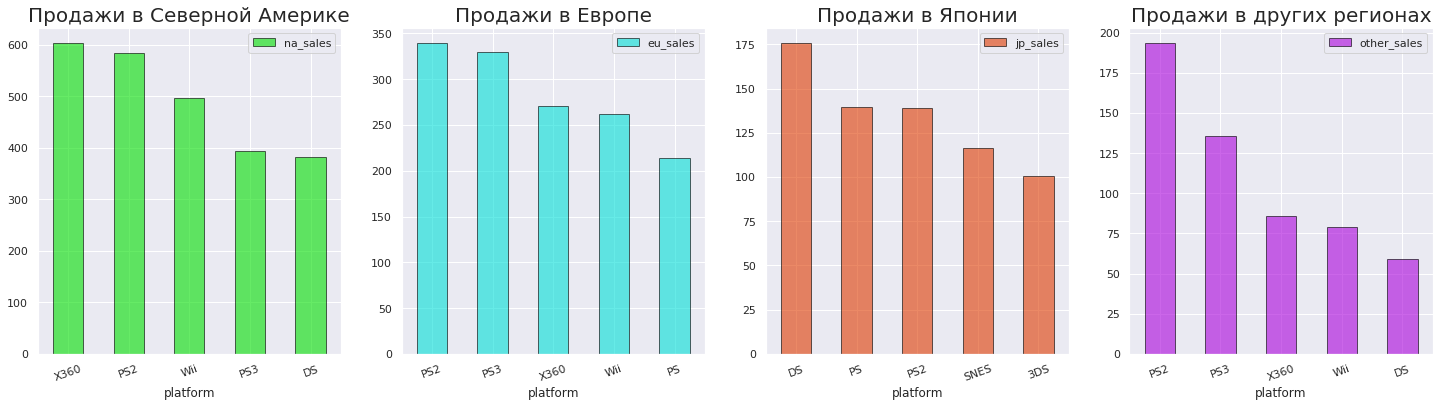

In [44]:
fig, axes = plt.subplots(1, 4, figsize=(25,6))

plot_test('na_sales','platform',  0)
plot_test('eu_sales','platform',  1)
plot_test('jp_sales','platform',  2)
plot_test('other_sales','platform',  3)

Что же, в среднем, Европа и другие регионы активно закупают игры платформы PS2, пока Северная Америка - свою отечественную Х360, а Япония - DS. В остальном в рейтинге фигурируют уже знакомые Wii, PS3, PS, SNES и 3DS.

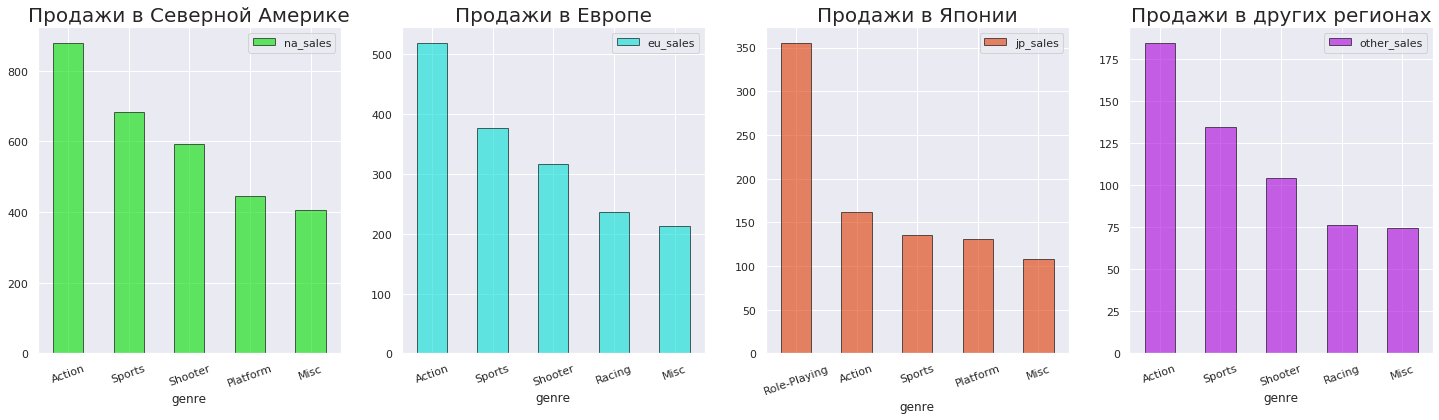

In [45]:
fig, axes = plt.subplots(1, 4, figsize=(25,6))

plot_test('na_sales','genre',  0)
plot_test('eu_sales','genre',  1)
plot_test('jp_sales','genre',  2)
plot_test('other_sales','genre',  3)

Предпочтения игр среди пользователей Северной Америки, Европы и других регионов показывают высокие результаты для action, sports, shooter. Так же на фоне выделяются платформеры и гонки, которые хоть и пользуются вдвое меньшей популярностью, чем тот же экшн. Что насчет Японии? Его ролевые игры, которые обгоняют все остальные жанры почти вдвое кажутся весьма привлекательными для игры на DS.

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.

«E»(«Everyone») — «Для всех»: для возрастной категории от 6 лет и старше; такие игры могут понравиться и взрослым. Первоначально "K-A" ("Kids to Adults")

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше.

«M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.

«AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет.

«RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.

In [46]:
ESRB = {'E': 'Для всех','E10+': 'старше 10 лет', 'T': '13-19 лет', 'M': 'старше 17 лет', 'AO':'старше 18 лет', 'K-A': 'Е(не используется)', 'RP' : 'В ожидании'}

In [47]:
data['ESRB'] = data[data['rating'].notnull()]['rating'].map(ESRB)

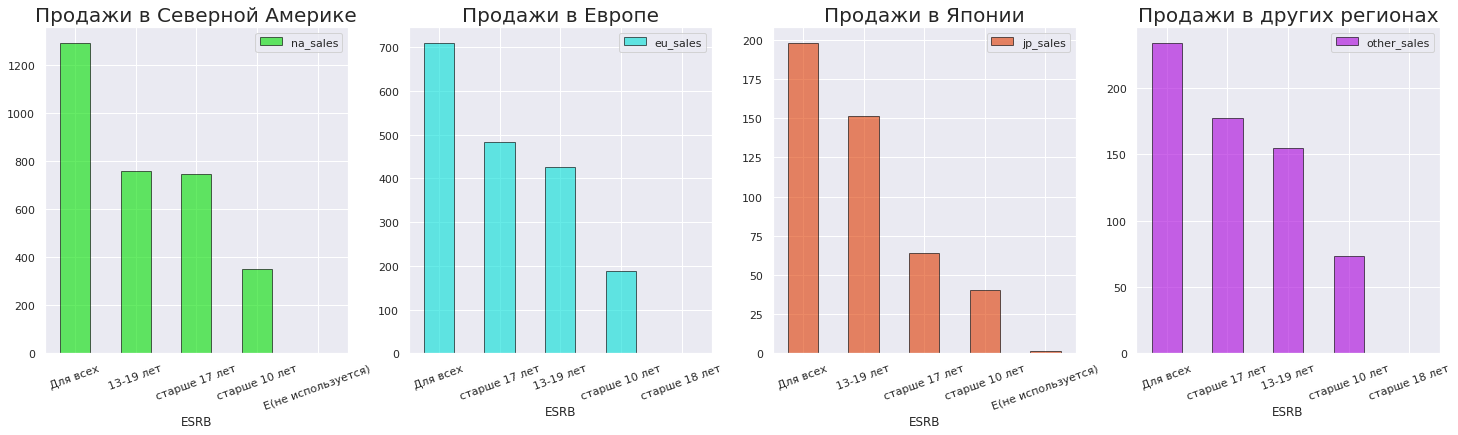

In [48]:
fig, axes = plt.subplots(1, 4, figsize=(25,6))

plot_test('na_sales','ESRB',  0)
plot_test('eu_sales','ESRB',  1)
plot_test('jp_sales','ESRB',  2)
plot_test('other_sales','ESRB',  3)

Отметка __"для всех"__ лидирует в Европе, Северной Америке, Японии и других регионах. Что в прицнипе и следовало ожидать, ибо название рейтинга предполагает максимальный охват аудитории. Далее можно заметить некоторые различия.

В Америке: __"13-19 лет"__ и __"17 лет"__ делят второе и третье место и группы примерно равны между собой, следующим идет рейтинг "старше 10 лет".

В Европе: __"17"__ и __"13-19 лет"__ занимают второе и третье соответственно и группы также примерно равны между собой, затем снова следует "старше 10 лет".

В Японии: ситуация практически полностью анологична с Америкой, правда отличие заключается в масштабе продаж.

В других регионах: ситуация вновь повторяется с Европой с различием в масштабе выручки.

Говоря о приставках, если анализировать причины текущего превосходства Microsoft, то можно сказать, что влияние оказывает такой фактор как патриотизм. Жители Северной Америки могут отдавать предпочтение компании из Америки, нежели из Японии, по этой причине продажи отечественной X360 чуть выше PS2. А вот с Японией дела могут обстоять немного иначе, думаю это больше связано с проблемами с жильем, люди таким образом экономят пространство, выбирая Nintendo, ведь портативная 3DS позволяет пользователю играть где-угодно. В Европе и других регионах больше доверяют японской PS2. 

Предполагаю, что популярность жанров в различных регионах основана на социокультурном влиянии и психологических особенностях населения. К примеру, западные страны больше предпочитают действие, спорт и стрельбу, когда та же Япония - ролевые игры.

О рейтингах, особой разницы не заметно. Во всех регионах большинство игр покупают для детей и подростков (категории 'E' и 'T'). Думаю, это также обуславливается менталитетом игроков.

__Вывод:__

1. Обычный пользователь из __Северной Америки__:

       ● Из консолей выбирает X360, PS2 или Wii;
       ● Чаще предпочитает игры жанра Action, Sports и Shooter, Platform, Misc;
       ● Не меньше чем в 50% случаев берет игры рейтингом - старше 17 лет или 13-19 лет;

2. Обычный пользователь из __Европы__:

       ● Отдает предпочтение PS2, но также выбирает X360 и PS3;
       ● Также чаще выбирает игры жанра Action, Sports и Shooter, Racing, Misc;
       ● Не меньше чем в 27% случаев - старше 17 лет, 24% случаев - 13-19 лет;

3. Обычный пользователь из __Японии__:

       ● Отдает предпочтение играм для платформ производства японских компаний Nintendo и Sony;
       ● Чаще, чем жители других регионов, выбирает портативные игровые консоли, такие как PSP и DS3;
       ● Обладает нетипичным для американцев и европейцев вкусом: чаще выбирает игры жанра Role-Playing, Action и Misc;
       ● Ввиду не очень большой популярности рейтинга ESRB (низкое количество игр было оценено по этой системе) объективной статистики по возрастам пользователей составить нельзя, по имеющимся же данным взрослых среди пользователей рейтинг старше 17 лет - не менее 14%, подростков - около 34%;

4. Обычный пользователь из __других стран__:

       ● Любит PS2, и, как и он, выбирает также X360 и PS3;
       ● Солидарен в своих предпочтениях с жителями Европы и Северной Америки: чаще выбирает игры жанра Action, Sports и Shooter;
       ● Также не имеет большой популярности рейтинга ESRB, по имеющимся же данным взрослых среди пользователей рейтинг старше 17 лет - не менее 28%, подростков - около 25%;

<div class="alert alert-block alert-warning">
Комментарий ревьюера v. 2:
    
Как Ты думаешь с чем могут быть связаны сходства и различия между регионами?
</div>

# Исследование статистических показателей.

In [49]:
data_ex = data[(data['critic_score'] > 0) & (data['user_score'] > 0) & (data['year_of_release'] != 3000)]

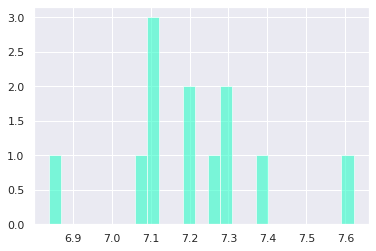

In [50]:
user = data_ex.pivot_table(index='genre', values='user_score', aggfunc='mean')
user['user_score'].hist(bins = 25, alpha = 0.6, color = '#2EFEC8');

Средний статистический показатель оценки пользователей по жанрам держится выше среднего.

In [51]:
user.sort_values(by = 'user_score', ascending = False)

,user_score
genre,
Role-Playing,7.620979
Platform,7.377171
Strategy,7.307194
Fighting,7.302111
Puzzle,7.250847
Simulation,7.191722
Adventure,7.190530
Racing,7.110751
Action,7.099453


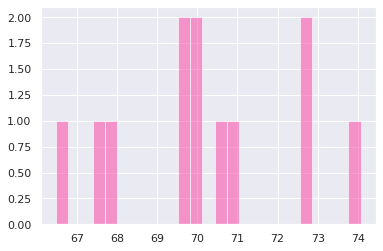

In [52]:
critic = data_ex.pivot_table(index='genre', values='critic_score', aggfunc='mean')
critic['critic_score'].hist(bins = 25, alpha = 0.6, color = '#FA58AC');

Средний статистический показатель оценки критиков по жанрам также держится выше среднего и в целом аналогично с оценками пользователей.

In [53]:
critic.sort_values(by = 'critic_score', ascending = False)

,critic_score
genre,
Sports,74.070452
Strategy,72.856115
Role-Playing,72.823776
Shooter,70.968894
Puzzle,70.694915
Platform,70.000000
Simulation,69.983444
Fighting,69.693931
Racing,69.621160


В целом, оценки критиков и оценки пользователей совпадают и жанры получили довольно не низкие баллы выше 65. В обоих рейтингах жанры __'Roleplay'__ и __'Strategy'__ пробились в топ. 

In [54]:
us = user['user_score'].to_list()

variance_estimate_user = np.var(us, ddof = 1)
print(f'Дисперсия оценок пользователей по жанрам равна - {variance_estimate_user}')
standard_deviation_user = np.std(us)
print(f'Стандартное отклонение оценок пользователей по жанрам равна - {standard_deviation_user}')

Дисперсия оценок пользователей по жанрам равна - 0.036620167893054174
Стандартное отклонение оценок пользователей по жанрам равна - 0.183217049521325


In [55]:
cr = critic['critic_score'].to_list()

variance_estimate_user = np.var(cr, ddof = 1)
print(f'Дисперсия оценок критиков по жанрам равна - {variance_estimate_user}')
standard_deviation_user = np.std(cr)
print(f'Стандартное отклонение оценок критиков по жанрам равна - {standard_deviation_user}')

Дисперсия оценок критиков по жанрам равна - 5.23442839809534
Стандартное отклонение оценок критиков по жанрам равна - 2.1904853415595813


# Проверка гипотез

__● Средние пользовательские рейтинги платформ Xbox One и PC одинаковые__

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Отлично, гипотезы сформулированы верно :)
</div>

In [56]:
xone = data[(data['platform'] == 'XOne') & (data['user_score'] > 0) & (data['year_of_release'] != 3000)]['user_score']
pc = data[(data['platform'] == 'PC') & (data['user_score'] > 0) & (data['year_of_release'] != 3000)]['user_score']

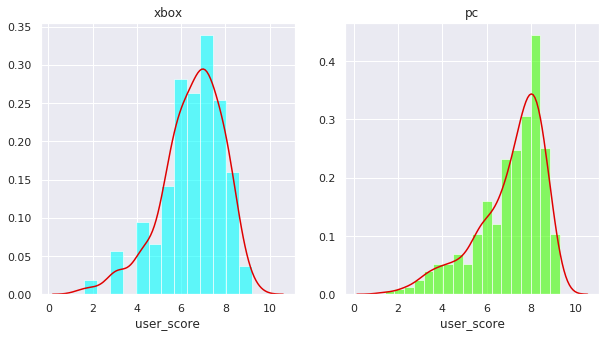

In [57]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
sns.distplot(xone, ax=axs[0], hist_kws={'color' : '#00FFFF', "alpha" : 0.6}, kde_kws={'color' : '#DF0101', 'alpha' : 1}).set_title('xbox')
sns.distplot(pc, ax=axs[1], hist_kws={'color' : '#40FF00', "alpha" : 0.6}, kde_kws={'color' : '#DF0101', 'alpha' : 1}).set_title('pc');

In [58]:
p = st.ttest_ind(xone, pc, equal_var= True)[1]
alpha = 0.5
print(f'p-value = {p:.10f}')

p-value = 0.0000130380


In [59]:
xone_mean = xone.mean().round(2)
pc_mean = pc.mean().round(2)

In [60]:
if (p < alpha):
    print("Отвергаем нулевую гипотезу", end = '')
    if xone_mean > pc_mean:
        print(f' в пользу XOne с средним значением {xone_mean}')
    else:
        print(f' в пользу PC с средним значением {pc_mean}')
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу в пользу PC с средним значением 7.07


Таким образом, различия довольно высокие для предположения равенства рейтингов. Средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой. И поэтому гипотеза неверна, совокупности разные. Соотвественно, если бы у нас стоял вопрос гипотезы, о различии двух ген.совокупностей, то в условии стоял знак меньше и мы бы отвергли нулевую гипотезу. 

__● Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.__

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

H1: Средние пользовательские рейтинги жанров Action и Sports различаются.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Молодец, что сформулировала нулевую и альтернативную гипотезы.
</div>

In [61]:
action = data[(data['genre'] == 'Action') & (data['user_score'] > 0) & (data['year_of_release'] != 3000)]['user_score']
sports = data[(data['genre'] == 'Sports') & (data['user_score'] > 0) & (data['year_of_release'] != 3000)]['user_score']

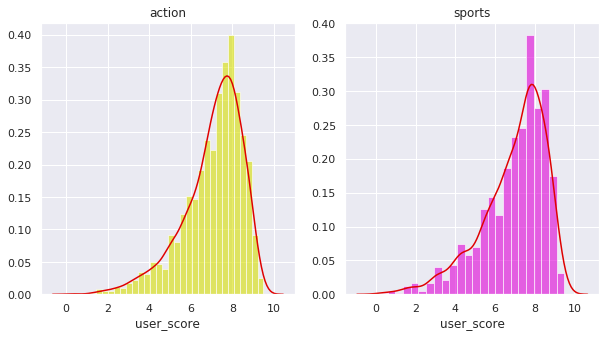

In [62]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
sns.distplot(action, ax=axs[0], hist_kws={'color' : '#D7DF01', "alpha" : 0.6}, kde_kws={'color' : '#DF0101', 'alpha' : 1}).set_title('action')
sns.distplot(sports, ax=axs[1], hist_kws={'color' : '#DF01D7', "alpha" : 0.6}, kde_kws={'color' : '#DF0101', 'alpha' : 1}).set_title('sports');

In [63]:
p = st.ttest_ind(action, sports, equal_var= False)[1]
alpha = 0.5
print(f'p-value = {p:.10f}')
action_mean = action.mean().round(2)
sports_mean = sports.mean().round(2)

p-value = 0.0737021742


In [64]:
if (p < alpha):
    print("Отвергаем нулевую гипотезу", end = '')
    if action_mean > sports_mean:
        print(f' в пользу Action с средним значением {action_mean}')
    else:
        print(f' в пользу Sports с средним значением {sports_mean}')
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу в пользу Action с средним значением 7.06


Средние пользовательские рейтинги различаются, и практически нулевая вероятность говорит о том, что случайно получить такое отличие в значениях практически не получится. Гипотеза __Средние пользовательские рейтинги жанров Action и Sports разные__ подтвердилась.

# Вывод

__Про развитие игровой индустрии:__ в целом, необновляемые и немобильные платформы постепенно уходят с рынка, гиганты этой сферы деятельности пытаются продвигать игры с более хорошей графикой, управлением и оптимизацией исходя из того как повысился средний бюджет на релиз игр. Мелкие организации отступают в этой гонке. В обозначении окончательной ценности игры более значимую роль играет рейтинг критиков(по шкале от 0 до 100) нежели пользовательский рейтинг(по шкале от 0 до 10). Средняя продолжительность существования платформ составляет 8-10 лет. Наиболее известные и многообещающие приставки на данный момент Sony PlayStation 4 и Xbox One. Продажа-закупка игр в основном в рейтинге "для всех" и для подростков 13-19 лет. Япония отличается своим специфичным рынком с уклоном в ролевой жанр и портативными устройствами собственного производства, пока остальные регионы имеют схожие данные потребления игр жанров экшен и шутер на консолях в роде PlayStation 2, PlayStation 3 и X360.

<div class="alert alert-block alert-info">
Комментарий ревьюера v. 1:
    
Я проверю анализ данных и  вывод после исправления периода времени выбранного для анализа.
</div>